In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

**制作提供信息的可视化(有时称为绘图)是数据分析中最重要的任务之一**，可视化可能是探索过程的一部分

`matplotlib`是一个**用于生成出版级质量图表的桌面绘图包**，目的是在于Python环境下进行MATLAB风格的绘图

随着时间的推移，`matplotlib`已经**产生了一些数据可视化的附加工具包**，**使用`matplotlib`进行底层绘图**

`matplotlib`和 `IPython`社区合作简化了Ipython shell, jupyter notebook的交互绘图

In [2]:
%matplotlib notebook # 如果没有新开figure，会把图绘制到最近使用的上面，而不是当前的输出cell； 适合 subfigure 子图

In [ ]:
%matplotlib inline # 画图画到下面的cell里

## 简明matplotlib API 入门

In [44]:
import matplotlib.pyplot as plt  # 导入惯例

In [45]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
plt.plot(arr)

### 图片与子图

`matplotlib`所绘制的图位于**图片对象**(`Figure`)中,使用`plt.figure`生成一个新的图片， `plt.figure`有一些选项，比如`figsize`是确保图片有一个确定大小以及存储到硬盘时的长宽比

**不能使用空白的图片绘图，需要创建一个或多个子图`subplot`**, `add_subplot`; **子图序号从1开始**

<IPython.core.display.Javascript object>


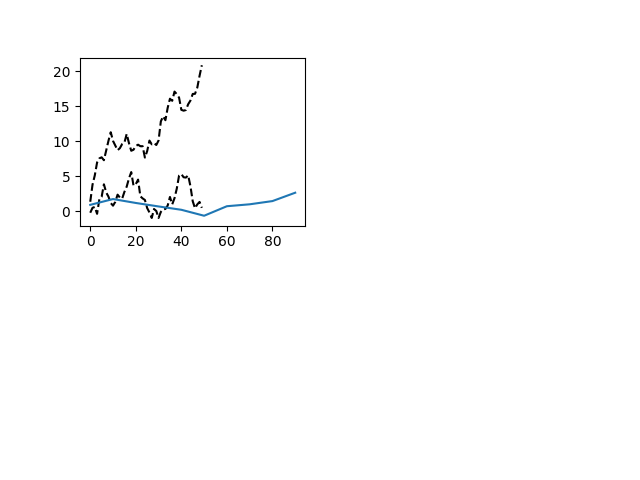

In [170]:
fig = plt.figure()

In [171]:
ax1 = fig.add_subplot(2,2,1)
ax1

<AxesSubplot:>

In [55]:
ax2 = fig.add_subplot(2,2,2)


In [56]:
ax3 = fig.add_subplot(2,2,3)

In [173]:
plt.plot( np.random.randn(50).cumsum(), 'k--')  # 画到上面的Figure去了

In [58]:
plt.Figure?

In [59]:
plt.figure?

`fig.add_subplot`返回的对象是`AlexSubplot`，使用这些对象支持在其他空白的子图上**调用对象的实例方法进行绘图**

In [60]:
ax1.hist( np.random.randn(100), bins=20, color='k', alpha=0.3 )

(array([ 1.,  4.,  5.,  1., 10.,  7.,  7.,  8., 12., 13., 12.,  8.,  2.,
         6.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([-2.2284, -1.9582, -1.6879, -1.4176, -1.1474, -0.8771, -0.6068,
        -0.3366, -0.0663,  0.204 ,  0.4742,  0.7445,  1.0147,  1.285 ,
         1.5553,  1.8255,  2.0958,  2.3661,  2.6363,  2.9066,  3.1769]),
 <BarContainer object of 20 artists>)

In [62]:
ax2.scatter( np.arange(30), np.arange(30)+ 3 * np.random.randn(30) )

In [63]:
plt.close('all') # 关闭

**使用子图网格创建图片是非常常见的任务**， `matplotlib`中包含了一个**快捷的方式**`plt.subplots`,**创建一个新的图片，然后返回包含了已经生成子图对象的NumPy数组**

In [66]:
plt.subplots?

<IPython.core.display.Javascript object>


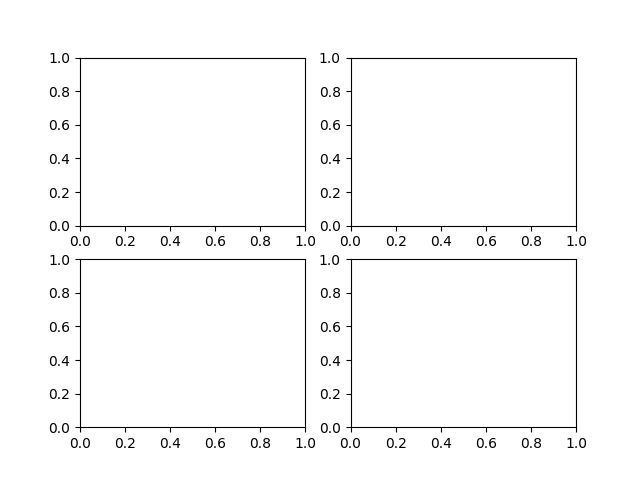

In [67]:
fig, axes = plt.subplots(2,2)

In [68]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

**这是非常便利的**，因为**数组可以像二维数组那样方便的索引**， `sharex`和`sharey`来表明子图分别拥有相同的x轴和y轴，在**相同的比例下进行图形对比时，非常有用**

### 调整子图周围的间距(留白)

默认情况下，`matplotlib`会在**子图的外部**和**子图之间**留出一定的间距，这个间距**是相对于图的高度和宽度来指定的**

通过编程或者手动使用GUI窗口调整图的大小时，**图就会自动调整**， 也可以使用图的方法`subplots_adjust`方法来**更改间距**

In [69]:
plt.subplots_adjust?

    left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=None,
    


`hspace`和`wspace`分别控制的是**图片的宽度和高度百分百**，以**用作子图的间距**

<IPython.core.display.Javascript object>


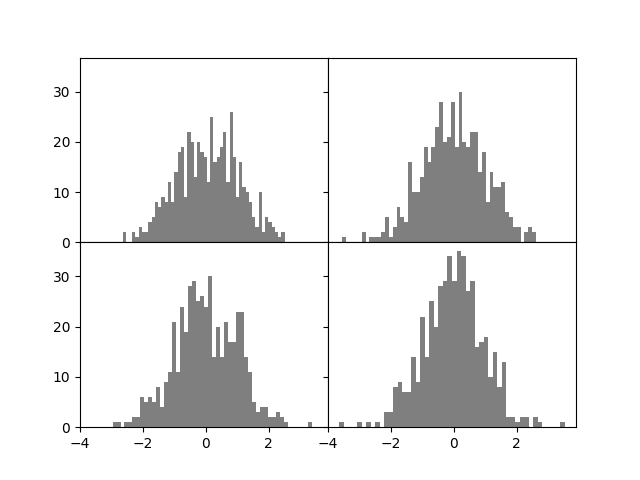

In [82]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

In [83]:
for i in range(2):
    for j in range(2):
        axes[i,j].hist( np.random.randn(500), bins=50, color='k', alpha=0.5 )

In [84]:
fig.subplots_adjust( wspace=0, hspace=0 )

In [76]:
fig.subplots_adjust( wspace=0.5, hspace=0.5 )

In [79]:
type(fig)

matplotlib.figure.Figure

### 颜色，标记和线类型

`matplotlib`的主函数`plot`接受**带有x和y轴的数组**以及**可选字符串缩写参数来指明颜色和线类型**

在字符串中指定颜色和线条样式的方式是方便的，以编程的方式绘图，**可能不希望将字符串混合在一起以创建所需样式的图表**

In [ ]:
ax.plot(x, y , linestyle='--', color='g', marker='o')

color:
- 许多**颜色缩写**被用于常用颜色
- 指定**十六进制颜色代码**

样式字符串中， **线类型，标记类型必须跟在颜色后面**
- 折线图中，**使用标记来凸显实际的数据点**
- 折线图中， 数据点之间的点默认是**线性内插的**，`drawstyle`可以更改

`label`参数，设值图例，**必须使用`plt.legend`来生成图例**

In [93]:
plt.close('all')

<IPython.core.display.Javascript object>


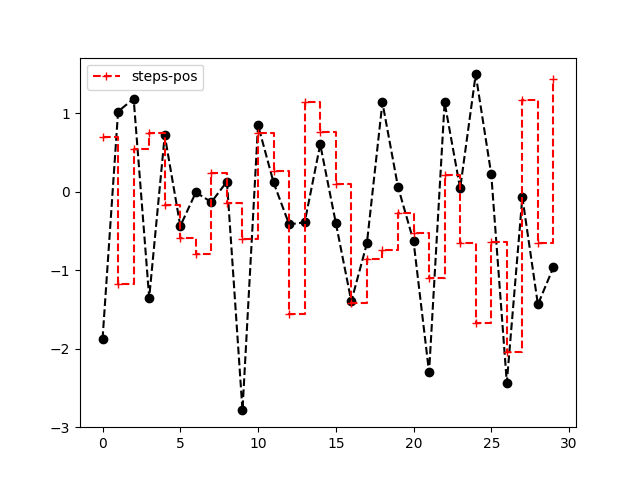

In [94]:
plt.plot( np.random.randn(30), 'ko--');

In [95]:
plt.plot( np.random.randn(30), color='r', marker='+', linestyle='--', drawstyle='steps-post', label='steps-pos');

In [96]:
plt.legend()

In [104]:
plt.close('all')

In [107]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


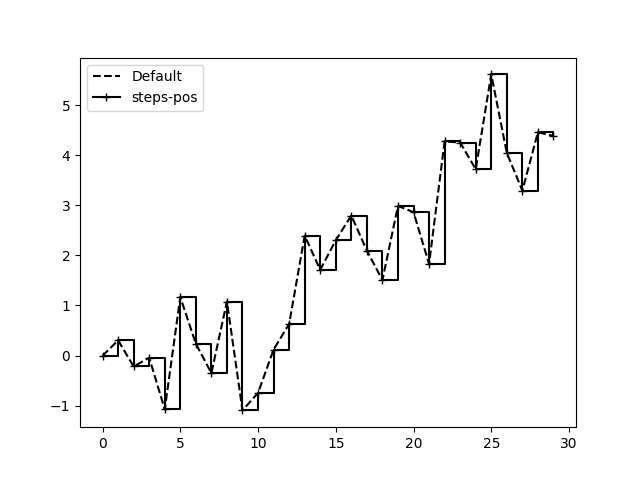

In [108]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', marker='+',drawstyle='steps-post', label='steps-pos')

In [110]:
plt.legend(loc='best')

In [111]:
plt.close('all')

### 刻度，标签和图例

大多数图表装饰工作，有两种主要的形式
1. 使用程序性的pyplot接口（matplotlib.pyplot）
2. 面向对象的原生matplotlib API

pyplot接口设计为**交互式**使用，包含了`xlim, xticks和xticklabels`等方法，这些方法分别控制了**绘图范围，刻度位置以及刻度标签**
1. 在没有函数参数的情况下调用，返回当前的参数值
2. 传入参数的情况下调用，设值参数值

所有这些方法都会在当前活动的或最近创建的AlexSubplot上生效，这些方法中**每一个对应于子图自身的两个方法** `set`和`get`

#### 设置标题，轴标签，刻度和刻度标签

<IPython.core.display.Javascript object>


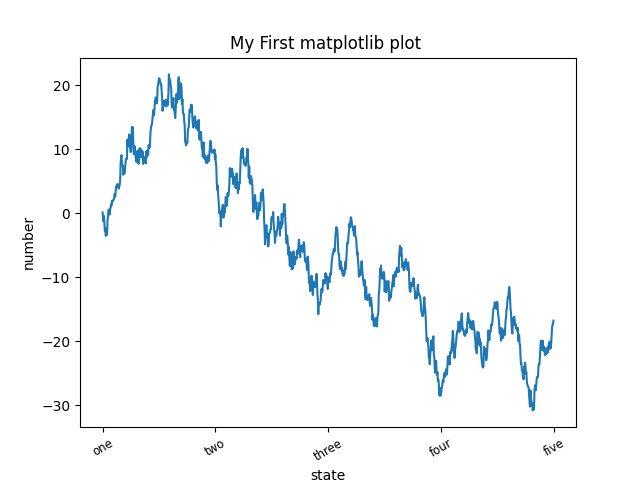

In [116]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [117]:
ax.plot(np.random.randn(1000).cumsum());

In [119]:
ax.set_xticks([0, 250, 500, 750, 1000]);

In [122]:
ax.set_xticklabels( ['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small' );

In [123]:
ax.set_title('My First matplotlib plot ')

Text(0.5, 1.0, 'My First matplotlib plot ')

In [124]:
ax.set_xlabel('state')

Text(0.5, 10.888891973024519, 'state')

In [125]:
props = {
    'ylabel': 'number'
}
ax.set(**props)

[Text(35.472222222222214, 0.5, 'number')]

#### 图例

图例是用来**区分绘图元素**的另一个重要类型，有多种方式添加图例

最简单的方式： 添加每个图表时**传递`label`参数**， 调用`plt.lengend()`或者`lengend()`方法**自动生成图例**

`legend`有多个其他位置参数`loc`,告诉`matplotlib`在哪里放置图表，`best`是一个好选项，它**会自动选择最合适的位置**

取消图例中的元素，不要传入`label`参数或传入`label='_nolegend_'`

In [126]:
plt.close('all')

<IPython.core.display.Javascript object>


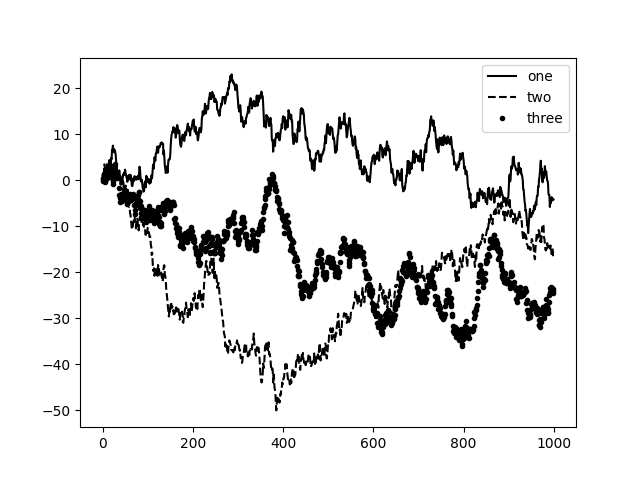

In [127]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [130]:
ax.plot( np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot( np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot( np.random.randn(1000).cumsum(), 'k.', label='three');

In [131]:
ax.legend(loc='best');

In [132]:
plt.close('all')

### 注释和子图加工

除了标准的绘图类型，可能会想在图表上**绘制自己的注释**， 注释中可能会包含
- 文本  text 
- 箭头 arrow 
- 其他图形 annote

`text`在图表上给定的坐标(x,y),根据可选的定制样式绘制文本
- **注释可以同时绘制文本和箭头**

In [133]:
from datetime import datetime

<IPython.core.display.Javascript object>


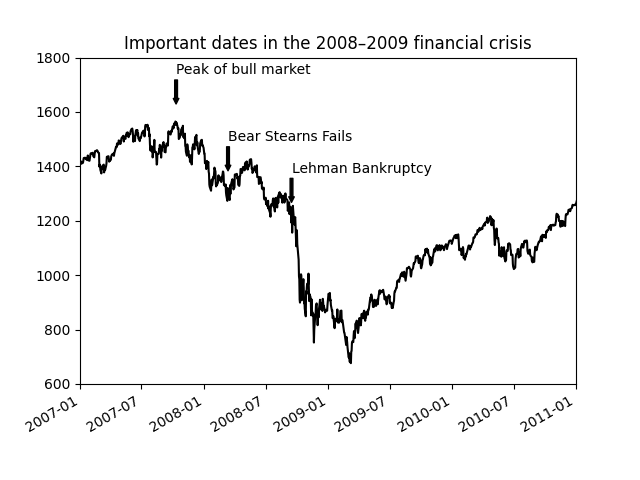

In [152]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1);

In [137]:
data = pd.read_csv('pydata-book/examples/spx.csv', index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


In [139]:
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [140]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [153]:
spx.plot(ax=ax, style='k-')

<AxesSubplot:>

In [154]:
ax.set_xlim( ['1/1/2007', '1/1/2011'] )
ax.set_ylim([600,1800]);

In [155]:
for data, label in crisis_data:
    ax.annotate(label, xy=(data, spx.asof(data)+75),
                xytext=(data, spx.asof(data) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top'
                )

In [156]:
spx.asof?

In [157]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

In [159]:
spx.asof('1990-02-01')

328.79

`matplotlib`含有**表示多种图形的对象**, 这些对象的引用是`patches`, 比如矩形`Rectangle，Circle`,可以在`matplotlib.pyplot`中找到，但是**图形的全集位于`matplotlib.patches`**

想要在图表中添加图形，需要**生成`path` 补丁对象**`shp`,并调用`ax.add_patch`将它添加到子图中

<IPython.core.display.Javascript object>


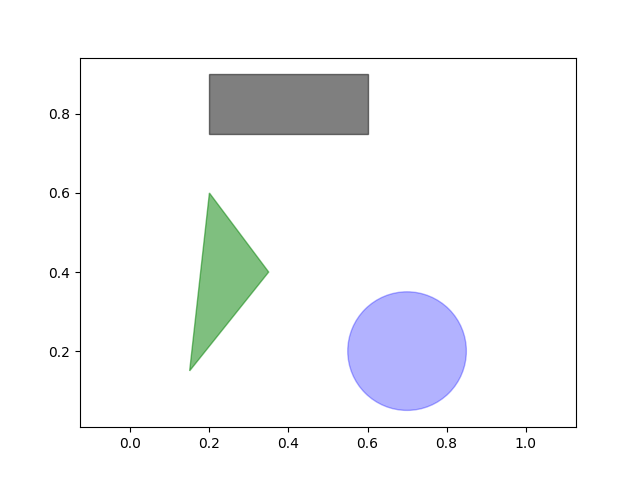

In [160]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [162]:
rect = plt.Rectangle( (0.2, 0.75), 0.4, 0.15, color='k', alpha=0.5)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

In [164]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

In [166]:
plt.axis('equal')

(0.11499999999999999, 0.885, 0.007500000000000014, 0.9425)

### 将图片保存到文件

`plt.asvefig`将当前活动图片保存到文件，等价于`fig.savefig`

文件类型是从文件扩展名来推断的
- `dpi`: 每英寸像素点
- `bbox_inches`: 修建实际图形的图片， `tight`: 去掉图片周围的空白

In [165]:
plt.savefig('figpath.pdf')

In [167]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

###  matplotlib设值

`matplotlib`配置了配色方案和默认设值，主要要用准备发布的图片。幸运的是，**几乎所有的默认行为都可以通过广泛的全局参数来定制**。包括图形大小，子图间距，颜色，字体大小，网格样式等，**使用`rc`方法是使用Python编程修改配置的一种方式**

In [ ]:
plt.rc('figure', figsize=(10, 10))

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

`rc`
- 第一个参数： **想要自定义的组件**， figure， axes， xtick， ytick
- 第二个参数： **关键字参数的序列指定新参数， 或者字典**

## 使用pandas和seaborn绘图

`matplotlib`是一个**相当底层的工具**，**从其基本组件中组装一个图表**：数据显示（即绘图的类型: 线，条，框，散点图，轮廓图等），图例，标题，刻度标记和其他注释

`pandas`中，可能有多个数据列，并且带有行和列的标签，**pandas自身有甚多内建的方法可以简化从DataFrame和Series对象生成可视化的过程**

`seaborn`库，有Michael Waskom 创建的统计图形库，**简化了很多常用可视化类型的生成**

导入`seaborn`会修改默认的`matplotlib`配色方案和绘图样式，会提高图表的可读性和美观性，即使不适用seaborn的API，**可能更喜欢导入seaborn来为通用的matplotlib图表提供更好的视觉美观度**

In [169]:
pip install seaborn

Looking in indexes: https://pypi.doubanio.com/simple
     |████████████████████████████████| 283 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 1.7 MB/s eta 0:00:01    |█████                           | 4.0 MB 954 kB/s eta 0:00:23
Note: you may need to restart the kernel to use updated packages.


In [178]:
plt.close('all')

### 折线图

`Series`和`DataFrame`都有一个`plot`属性，**用于绘制基本的图形。默认情况下，`plot()`绘制的折线图**

In [176]:
s = pd.Series(  np.random.randn(10).cumsum(), index=np.arange(0,100,10) )
s

0     0.930077
10    1.758098
20    1.199928
30    0.702190
40    0.227999
50   -0.623119
60    0.735037
70    1.009153
80    1.468330
90    2.661958
dtype: float64

<IPython.core.display.Javascript object>


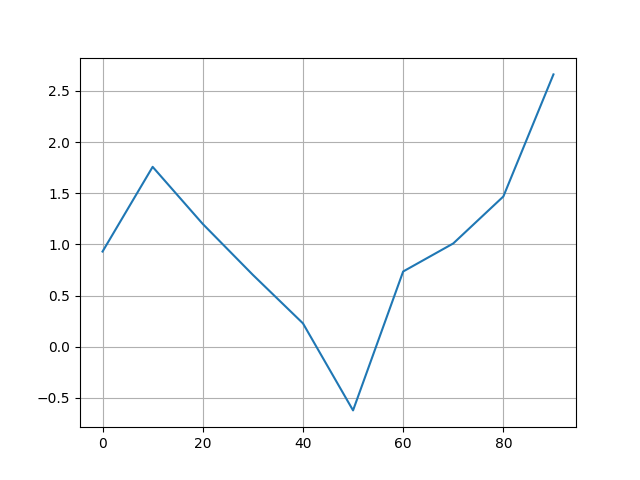

In [181]:
s.plot(grid=True);

`DataFrame`的`plot`方法在同一个子图中**将每一列绘制为不同的折线**，并自动生成图例

In [182]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [183]:
df

,A,B,C,D
0,0.319077,-0.101846,0.407142,-1.419240
10,0.262115,-0.667023,1.664391,-0.020413
20,2.481286,-1.110994,2.539479,1.315258
30,1.922866,-0.684342,1.891199,0.129993
40,1.226328,-1.367317,1.988740,-0.789911
50,1.162697,-1.390910,4.085969,0.319527
60,1.116942,-1.806987,3.424936,1.484587
70,1.309251,-1.800983,1.698781,1.028618
80,1.594790,-0.382720,1.753077,-1.086046
90,1.289944,0.535075,2.006592,-0.335299


<IPython.core.display.Javascript object>


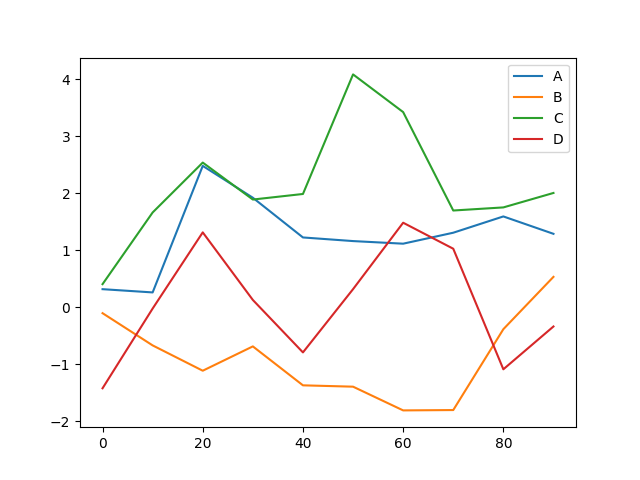

<AxesSubplot:>

In [186]:
df.plot()

<IPython.core.display.Javascript object>


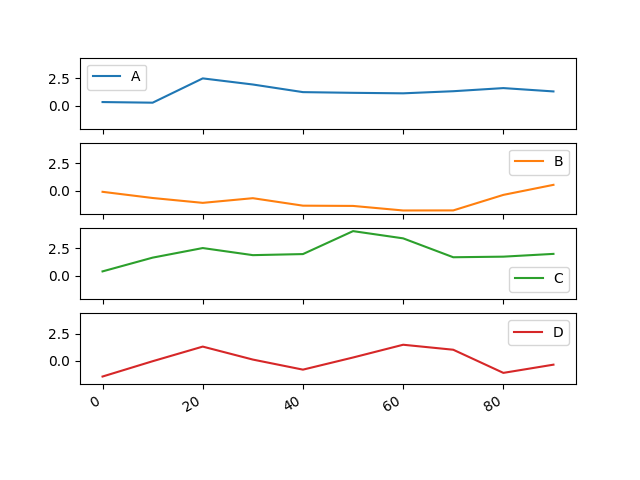

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [188]:
df.plot(subplots=True, sharex=True, sharey=True)

`plot`的其他关键字会传递到相应的matplotlib绘制函数

### 柱形图

- `plot.bar()`: 绘制**垂直**柱状图， 索引将用作`X`轴 bar
- `plot.barh()`：绘制**水平**柱状图, 索引将用作`Y`轴 barh

<IPython.core.display.Javascript object>


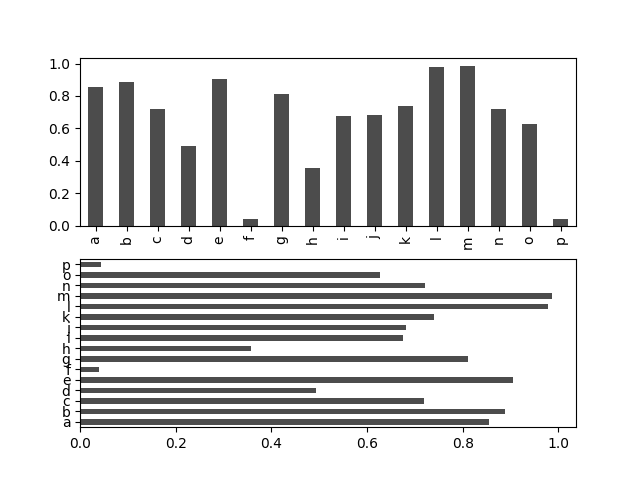

In [202]:
fig, axes = plt.subplots(2,1);

In [203]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [204]:
data = pd.Series( np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.854059
b    0.888547
c    0.718351
d    0.493784
e    0.905434
f    0.039399
g    0.810217
h    0.356644
i    0.674384
j    0.681051
k    0.739294
l    0.977494
m    0.987346
n    0.721922
o    0.627281
p    0.043307
dtype: float64

In [205]:
data.plot.bar( ax=axes[0], color='k', alpha=0.7 );

In [206]:
data.plot.barh( ax=axes[1], color='k', alpha=0.7 );

DataFrame中，柱状图将**每一行中的值分组到并排的柱子的中一组**

In [207]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.572479,0.909200,0.147545,0.847121
two,0.948231,0.221634,0.776373,0.977476
three,0.904737,0.969744,0.208588,0.303037
four,0.421628,0.145268,0.771461,0.989764
five,0.453280,0.443858,0.785441,0.865321
six,0.658062,0.658769,0.877804,0.769055


<IPython.core.display.Javascript object>


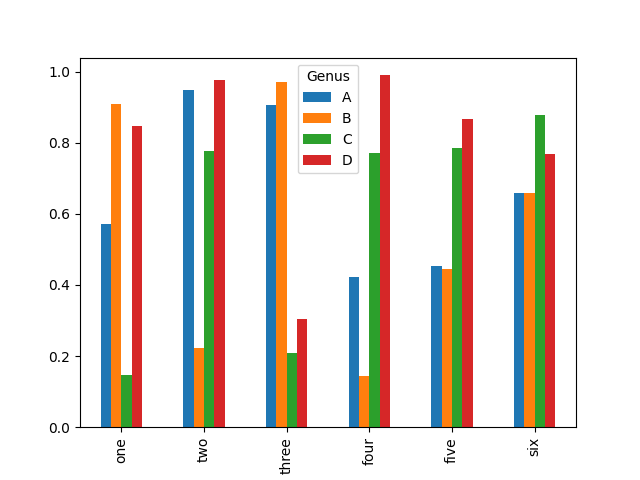

<AxesSubplot:>

In [208]:
df.plot.bar()

<IPython.core.display.Javascript object>


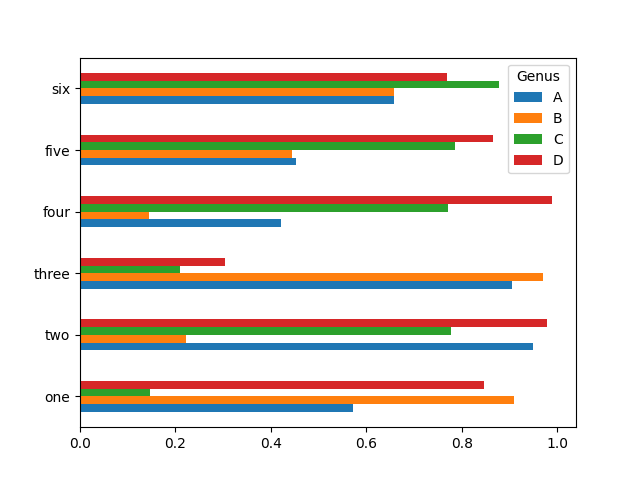

<AxesSubplot:>

In [209]:
df.plot.barh()

<IPython.core.display.Javascript object>


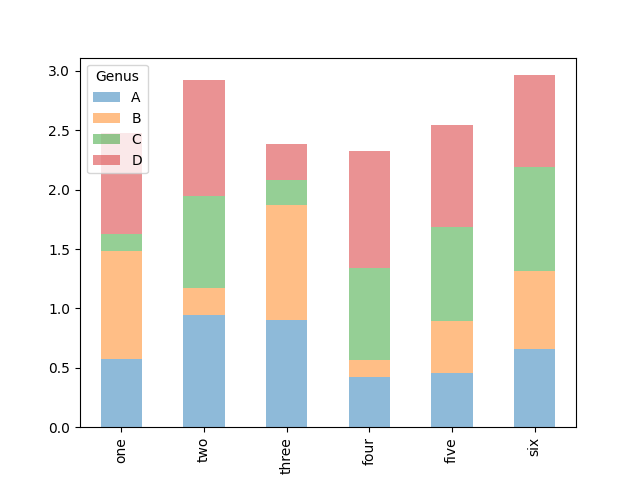

<AxesSubplot:>

In [210]:
df.plot.bar(stacked=True, alpha=0.5)

<IPython.core.display.Javascript object>


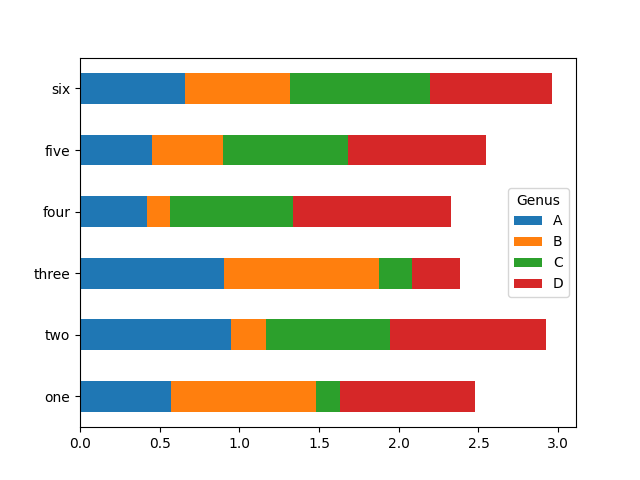

In [212]:
df.plot.barh(stacked=True);

In [213]:
tips = pd.read_csv('pydata-book/examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [221]:
party_counts = pd.crosstab( tips['day'], tips['size'] )
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [222]:
party_counts  =  party_counts.iloc[:, 1: -1]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [223]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [224]:
party_pcts = party_counts.div( party_counts.sum(1), axis=0 ) # 列做扩展

In [225]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


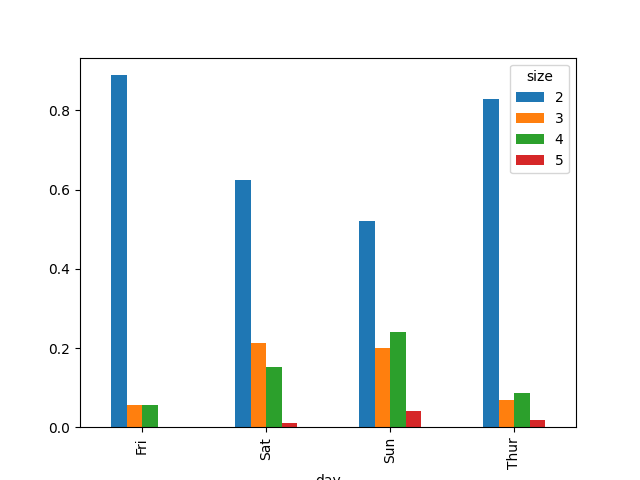

<AxesSubplot:xlabel='day'>

In [226]:
party_pcts.plot.bar()

<IPython.core.display.Javascript object>


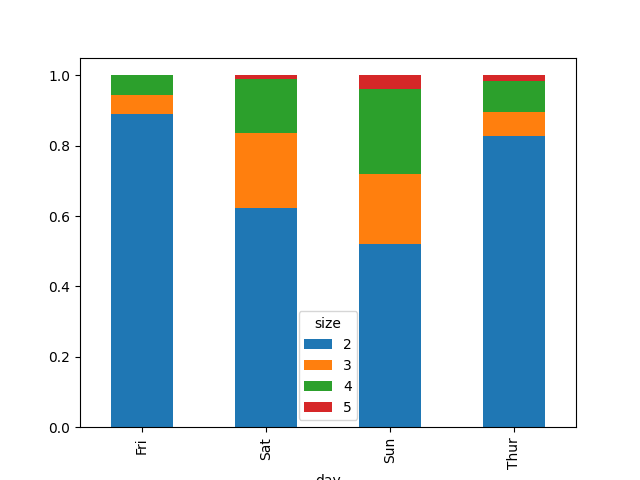

In [227]:
party_pcts.plot.bar(stacked=True);

In [241]:
plt.close('all')

In [229]:
import seaborn as  sns

In [230]:
tips['tip_pct'] = tips['tip'] / ( tips['total_bill'] - tips['tip'] )

In [231]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<IPython.core.display.Javascript object>


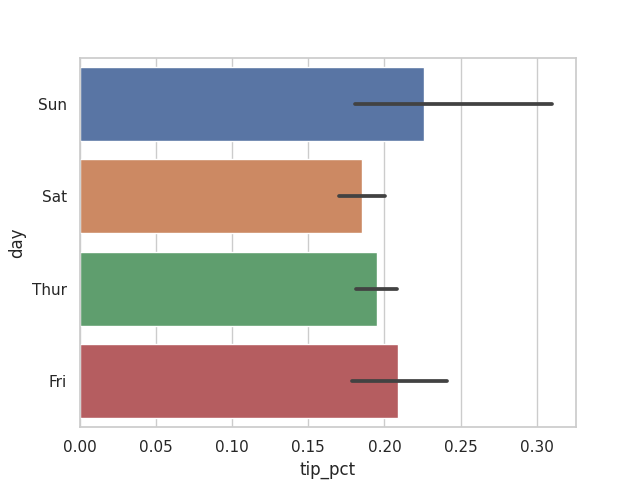

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [240]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h' )

<IPython.core.display.Javascript object>


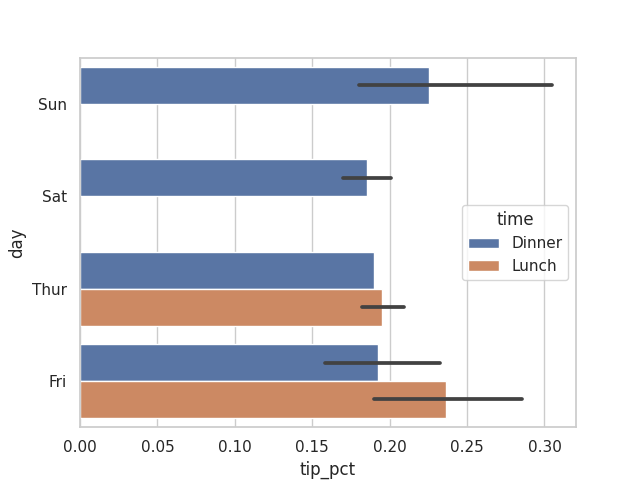

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [242]:
sns.barplot(x='tip_pct', y='day',hue='time', data=tips, orient='h' )

In [237]:
sns.set(style="whitegrid")

In [243]:
plt.close('all')

### 直方图和密度图

<IPython.core.display.Javascript object>


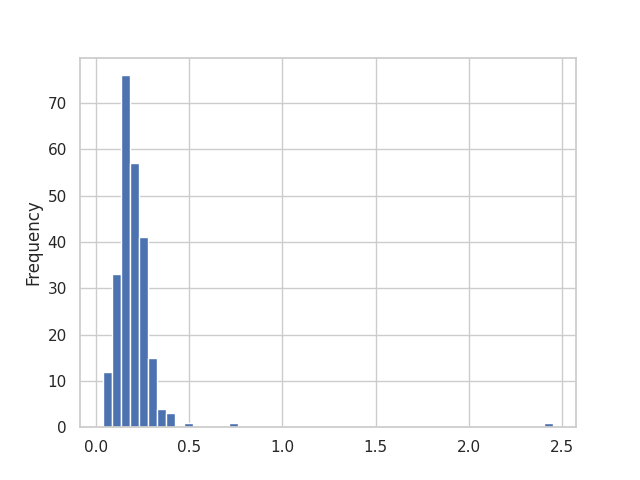

<AxesSubplot:ylabel='Frequency'>

In [244]:
tips['tip_pct'].plot.hist(bins=50)

In [268]:
plt.close('all')

<IPython.core.display.Javascript object>


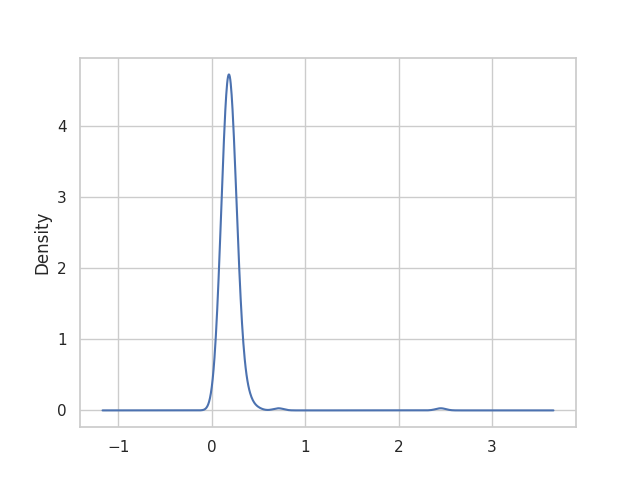

In [247]:
tips['tip_pct'].plot.density();

In [253]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
value = pd.Series( np.concatenate([comp1, comp2]))
value

0       1.079723
1      -0.027830
2       1.177158
3      -0.292625
4      -0.497577
         ...    
395    10.368148
396    12.691774
397     8.919119
398    10.186338
399    10.633310
Length: 400, dtype: float64

/home/zhaolong/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


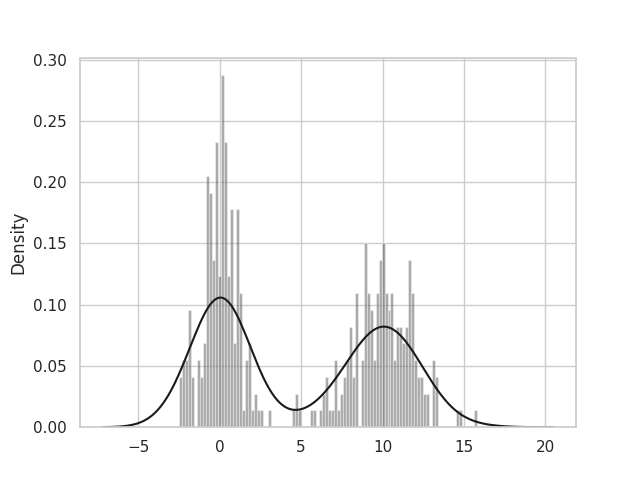

In [267]:
sns.distplot( value, bins=100, color='k' );

### 散点图或点状图

In [255]:
macro = pd.read_csv('pydata-book/examples/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [258]:
data = macro[ ['cpi', 'm1', 'tbilrate', 'unemp'] ]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [262]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


/home/zhaolong/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


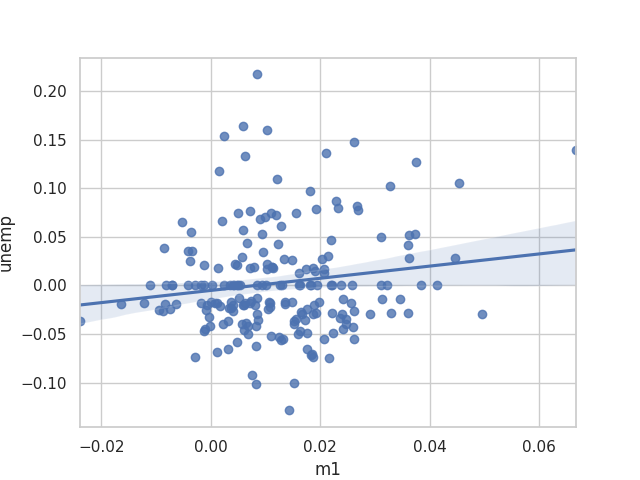

In [265]:
sns.regplot( 'm1', 'unemp', data=trans_data );

<IPython.core.display.Javascript object>


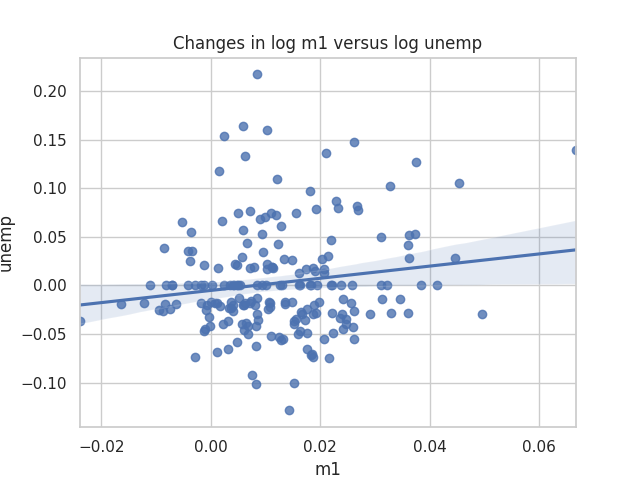

In [269]:
sns.regplot( x='m1', y='unemp', data=trans_data );

In [270]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


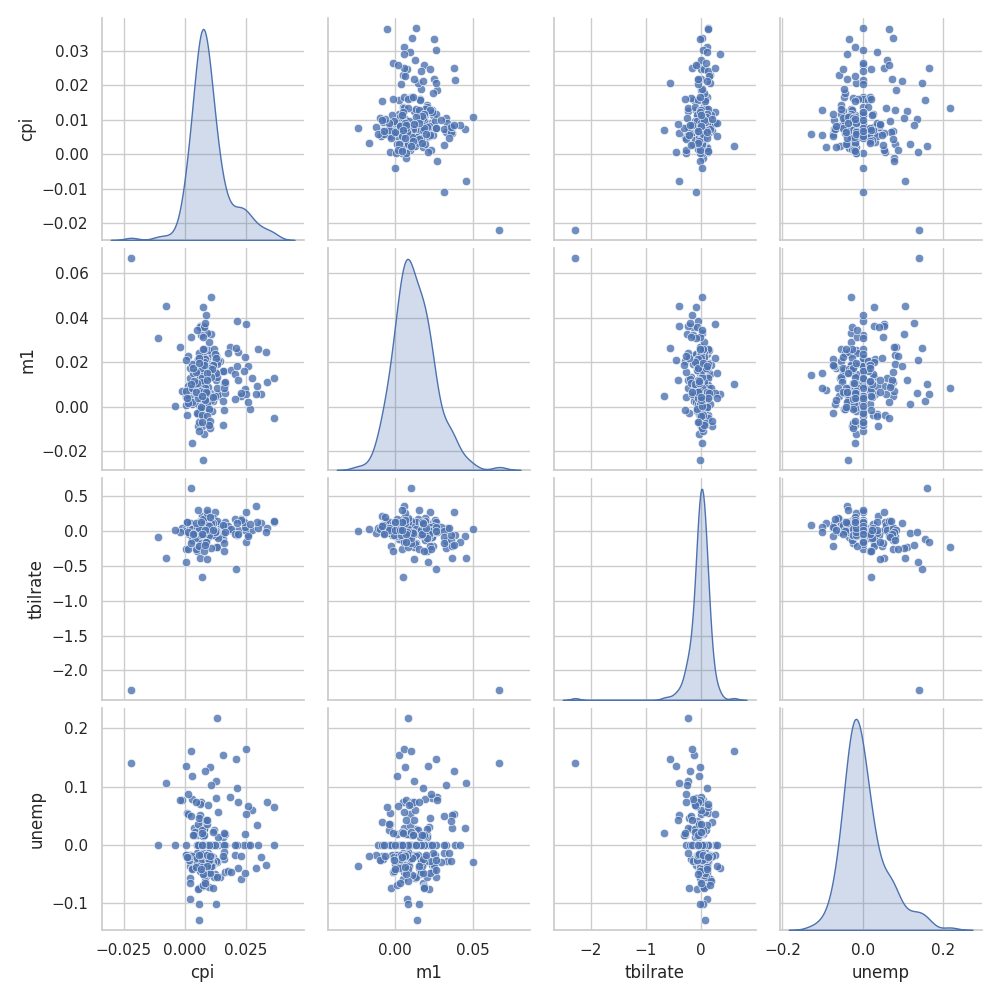

In [272]:
sns.pairplot( trans_data, diag_kind='kde', plot_kws={'alpha': 0.8} )

### 分面网格和分类数据

In [273]:
plt.close('all')

<IPython.core.display.Javascript object>


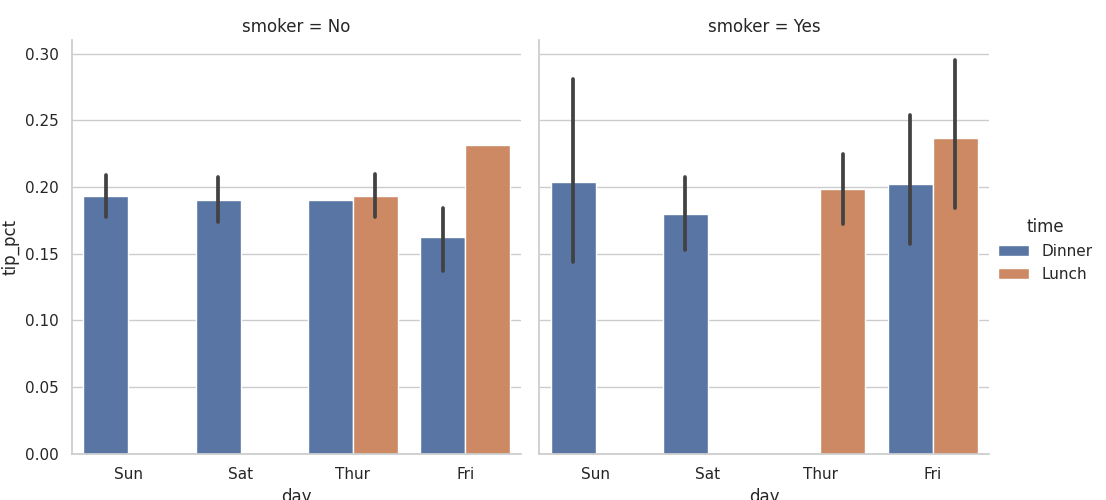

In [275]:
sns.catplot( x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1] ) 

<IPython.core.display.Javascript object>


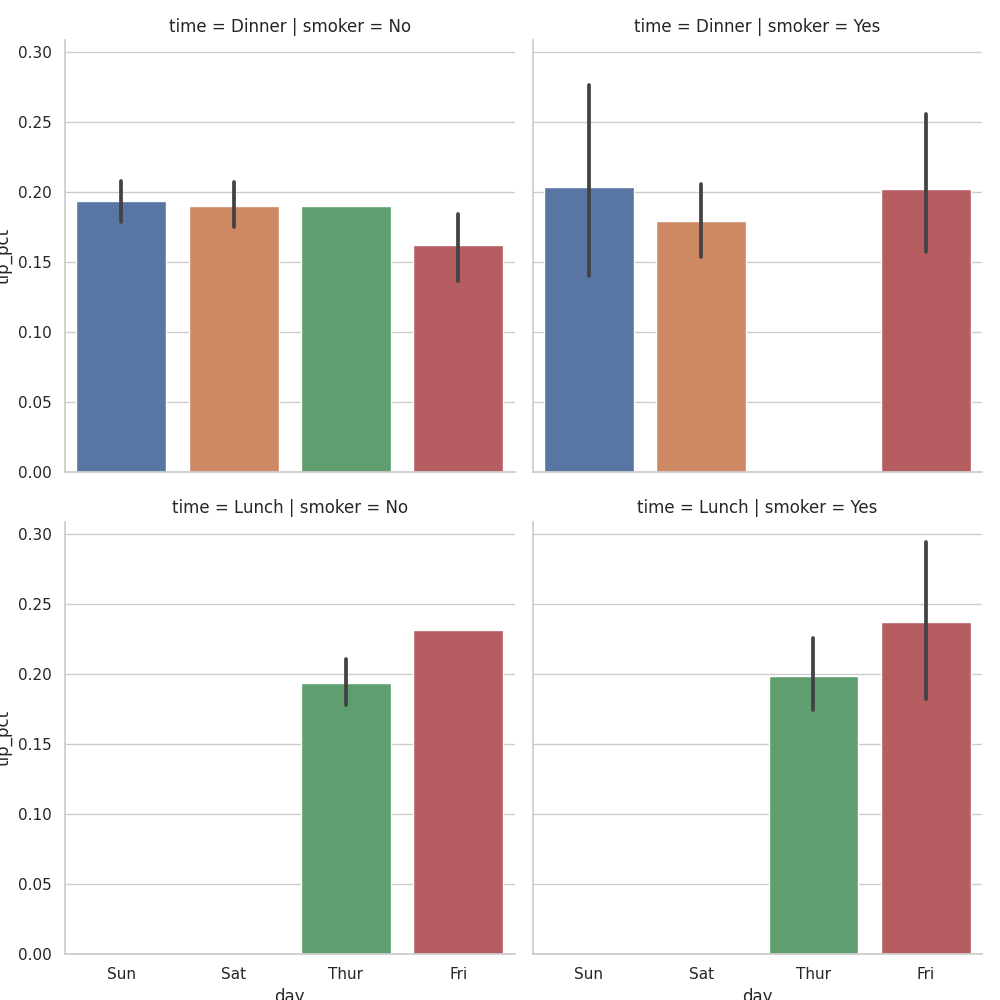

In [276]:
sns.catplot( x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1] ) 

<IPython.core.display.Javascript object>


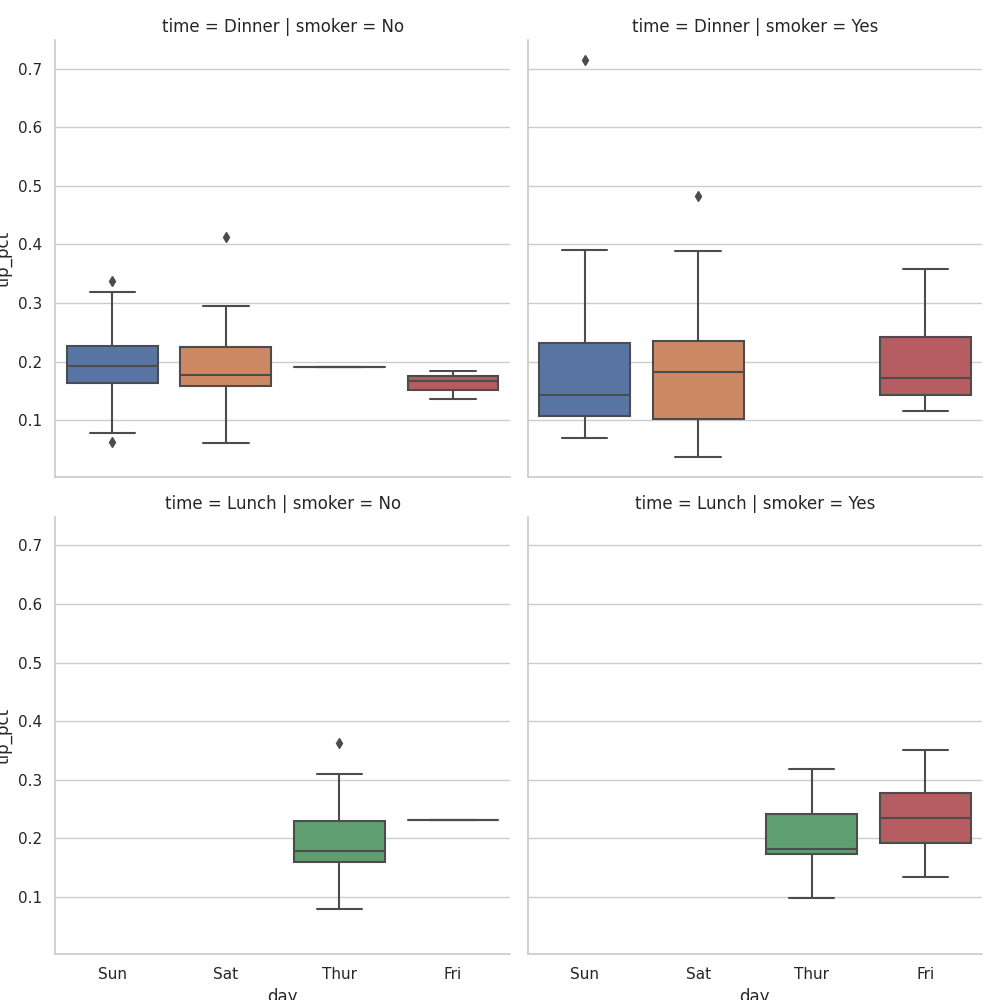

In [277]:
sns.catplot( x='day', y='tip_pct', row='time', col='smoker', kind='box', data=tips[tips.tip_pct < 1] ) 

### 其他的Python可视化工具

自2010年以来，许多的开发工作都集中在了创建web交互图形上，借助Bokeh和Plotly工具，在Web浏览器中创建动态的，狡猾是图像的工作已经可以实现